In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

pd.options.plotting.backend = "plotly"

In [2]:
def get_weekday(date_column):
    # Get the weekday index (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
    weekday_index = date_column.dt.weekday
    
    # Get the weekday name from the index
    weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    weekday_names = [weekdays[index] for index in weekday_index]
    
    return weekday_names

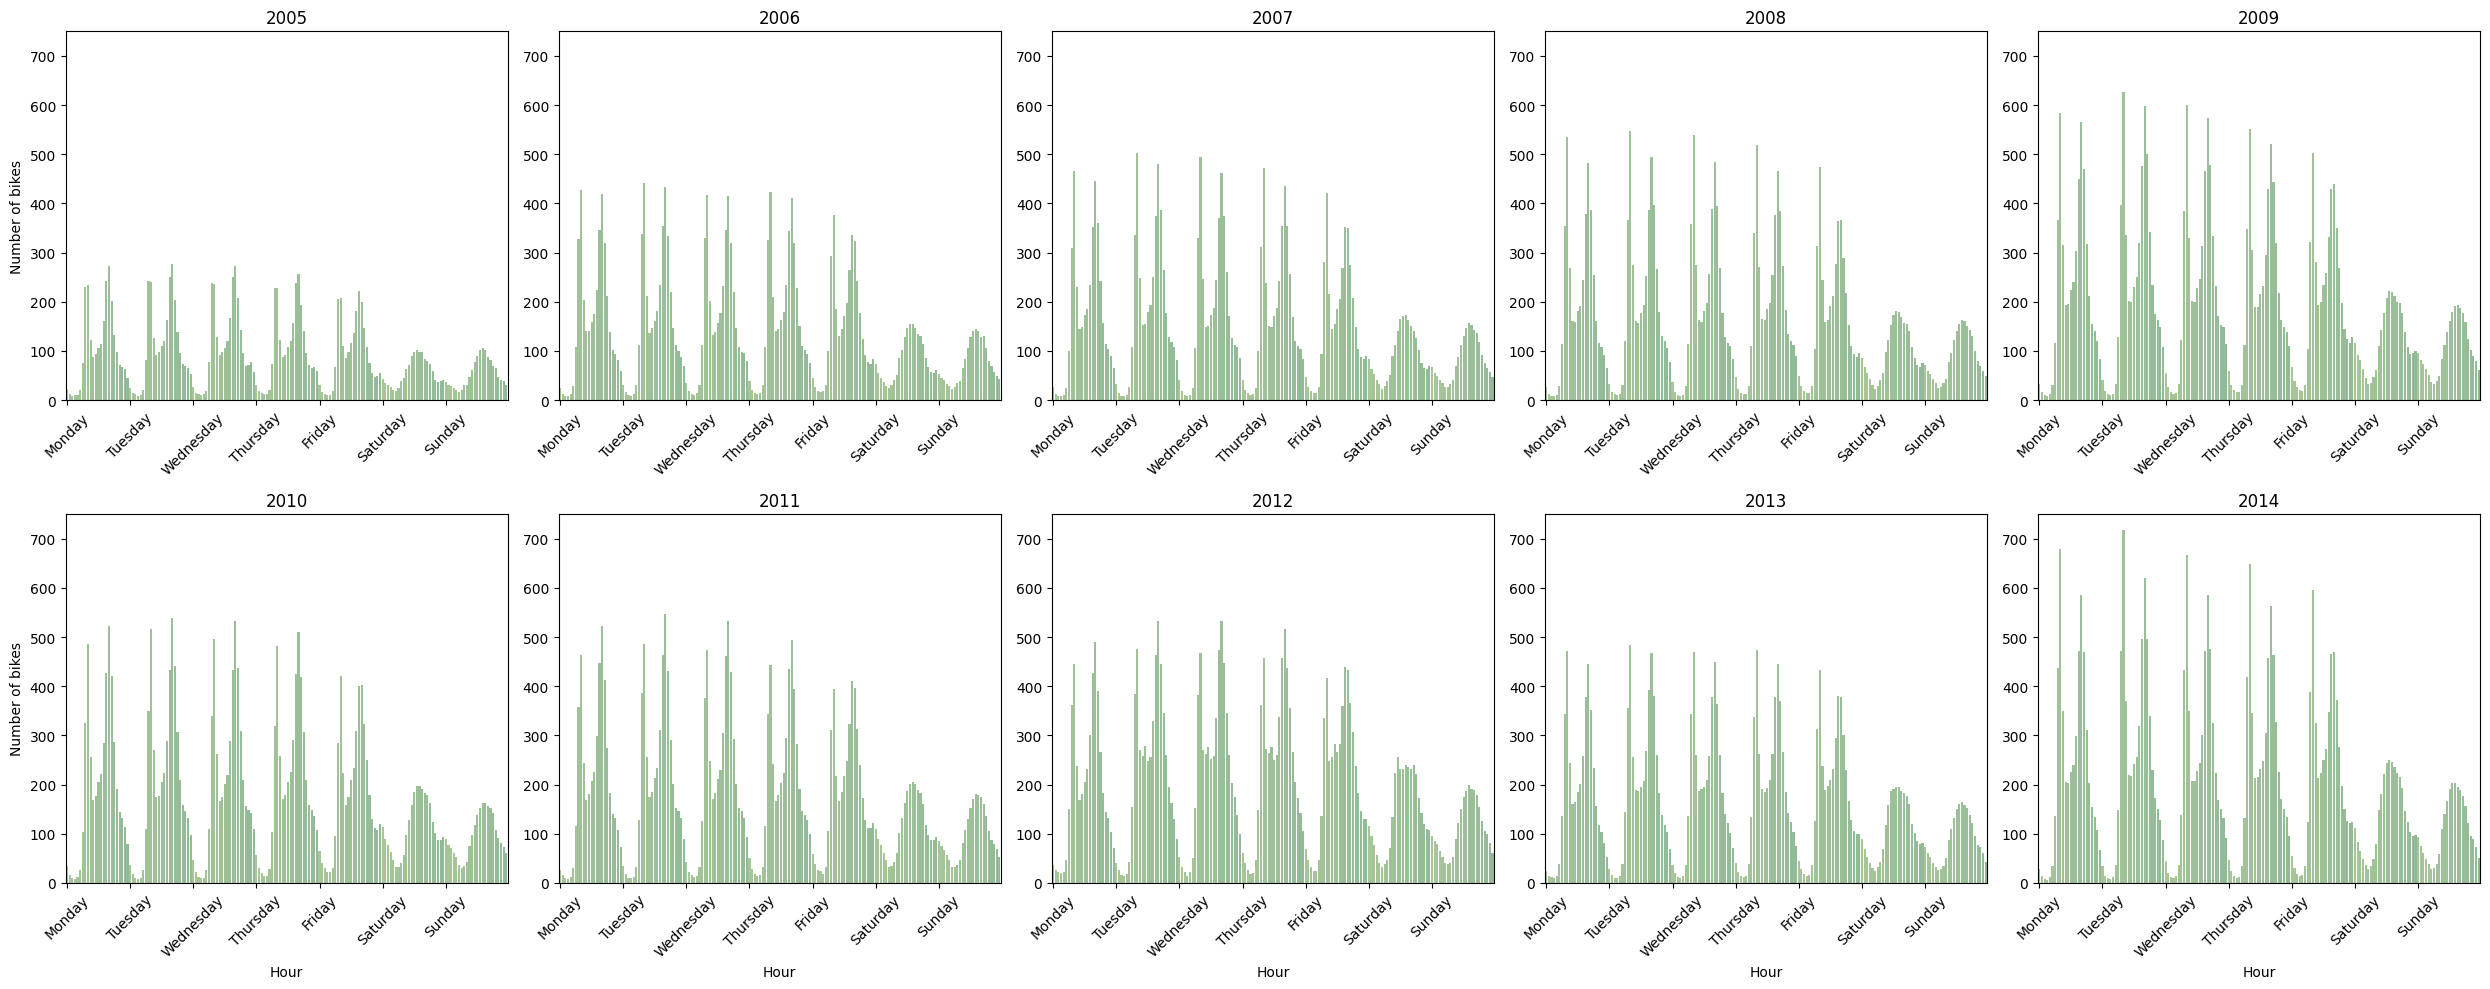

In [10]:
# Define a custom diverging blue color palette
blue_palette = sns.color_palette("crest",n_colors=24, as_cmap=True)

# Convert the ListedColormap object into a list of colors
blue_palette = [blue_palette(i) for i in range(24)]

# List of file paths for the datasets
file_paths = ['..\Data\cykeltaellinger-2005.xlsx', '..\Data\cykeltaellinger-2006.xlsx', '..\Data\cykeltaellinger-2007.xlsx',
              '..\Data\cykeltaellinger-2008.xlsx', '..\Data\cykeltaellinger-2009.xlsx', '..\Data\cykeltaellinger-2010.xlsx',
              '..\Data\cykeltaellinger-2011.xlsx', '..\Data\cykeltaellinger-2012.xlsx', '..\Data\cykeltaellinger-2013.xlsx', '..\Data\cykeltaellinger-2014.xlsx']

# Define the number of rows and columns for the subplot
num_rows = 2
num_cols = 5

# Create a new figure and axis for the subplot
fig, axs = plt.subplots(num_rows, num_cols, figsize=(25, 10))

for i, file_path in enumerate(file_paths):
    # Extract the year from the file path
    year = file_path.split('-')[1].split('.')[0]
    # Read the dataset from Excel file
    data = pd.read_excel(file_path, usecols='A:AD', skiprows=10)

    data['Dato'] = pd.to_datetime(data['Dato'], format='%d.%m.%Y')
    data['weekdays'] = get_weekday(data['Dato'])
    
    # Reshape the DataFrame so that each timeslot becomes a separate row
    df = data.melt(id_vars=['Dato', 'weekdays'], value_vars=['kl.00-01', 'kl.01-02', 'kl.02-03', 'kl.03-04', 'kl.04-05',
                                                          'kl.05-06', 'kl.06-07', 'kl.07-08', 'kl.08-09', 'kl.09-10',
                                                          'kl.10-11', 'kl.11-12', 'kl.12-13', 'kl.13-14', 'kl.14-15',
                                                          'kl.15-16', 'kl.16-17', 'kl.17-18', 'kl.18-19', 'kl.19-20',
                                                          'kl.20-21', 'kl.21-22', 'kl.22-23', 'kl.23-24'],
                  var_name='Hour', value_name='Value')
    
    # Create a new column with the combined weekday and hour
    df['Weekday_Hour'] = df['weekdays'] + '_' + df['Hour']
    # print(df['Weekday_Hour'])
    
    # Define the order of weekdays and hours
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    hours = ['kl.00-01', 'kl.01-02', 'kl.02-03', 'kl.03-04', 'kl.04-05', 'kl.05-06', 'kl.06-07', 'kl.07-08', 'kl.08-09',
             'kl.09-10', 'kl.10-11', 'kl.11-12', 'kl.12-13', 'kl.13-14', 'kl.14-15', 'kl.15-16', 'kl.16-17', 'kl.17-18',
             'kl.18-19', 'kl.19-20', 'kl.20-21', 'kl.21-22', 'kl.22-23', 'kl.23-24']
    
    # Create a new column with the order of weekdays and hours
    df['Weekday_Hour'] = pd.Categorical(df['Weekday_Hour'], categories=[f'{weekday}_{hour}' for weekday in weekdays for hour in hours], ordered=True)
    
    # Sort the DataFrame based on the order of weekdays and hours
    df = df.sort_values('Weekday_Hour')
    
    # Plot the data on the corresponding subplot
    ax = axs[i // num_cols, i % num_cols]
    sns.barplot(data=df, x='Weekday_Hour', y='Value', ax=ax, ci=None, palette=blue_palette)
    ax.set_title(year)

    if i % num_cols == 0:  # Check if the subplot is in the first column
        ax.set_ylabel('Number of bikes')
    else:
        ax.set_ylabel('')  # Set empty string for y-label for other subplots
    if i // num_cols == 1:
        ax.set_xlabel('Hour')
    else:
        ax.set_xlabel('')  # Set empty string for x-label for other subplots
    ax.set_xticks(range(0, 168, 24))  # Set ticks for weekdays
    ax.set_xticklabels(weekdays, rotation=45)  # Set labels for weekdays
    ax.set_ylim(0, 750)  # Set y-axis limit to start from 0
    ax.grid(False)
    
# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the plot
plt.show()
fig.savefig('168hourplot.png', dpi=300, bbox_inches = "tight")

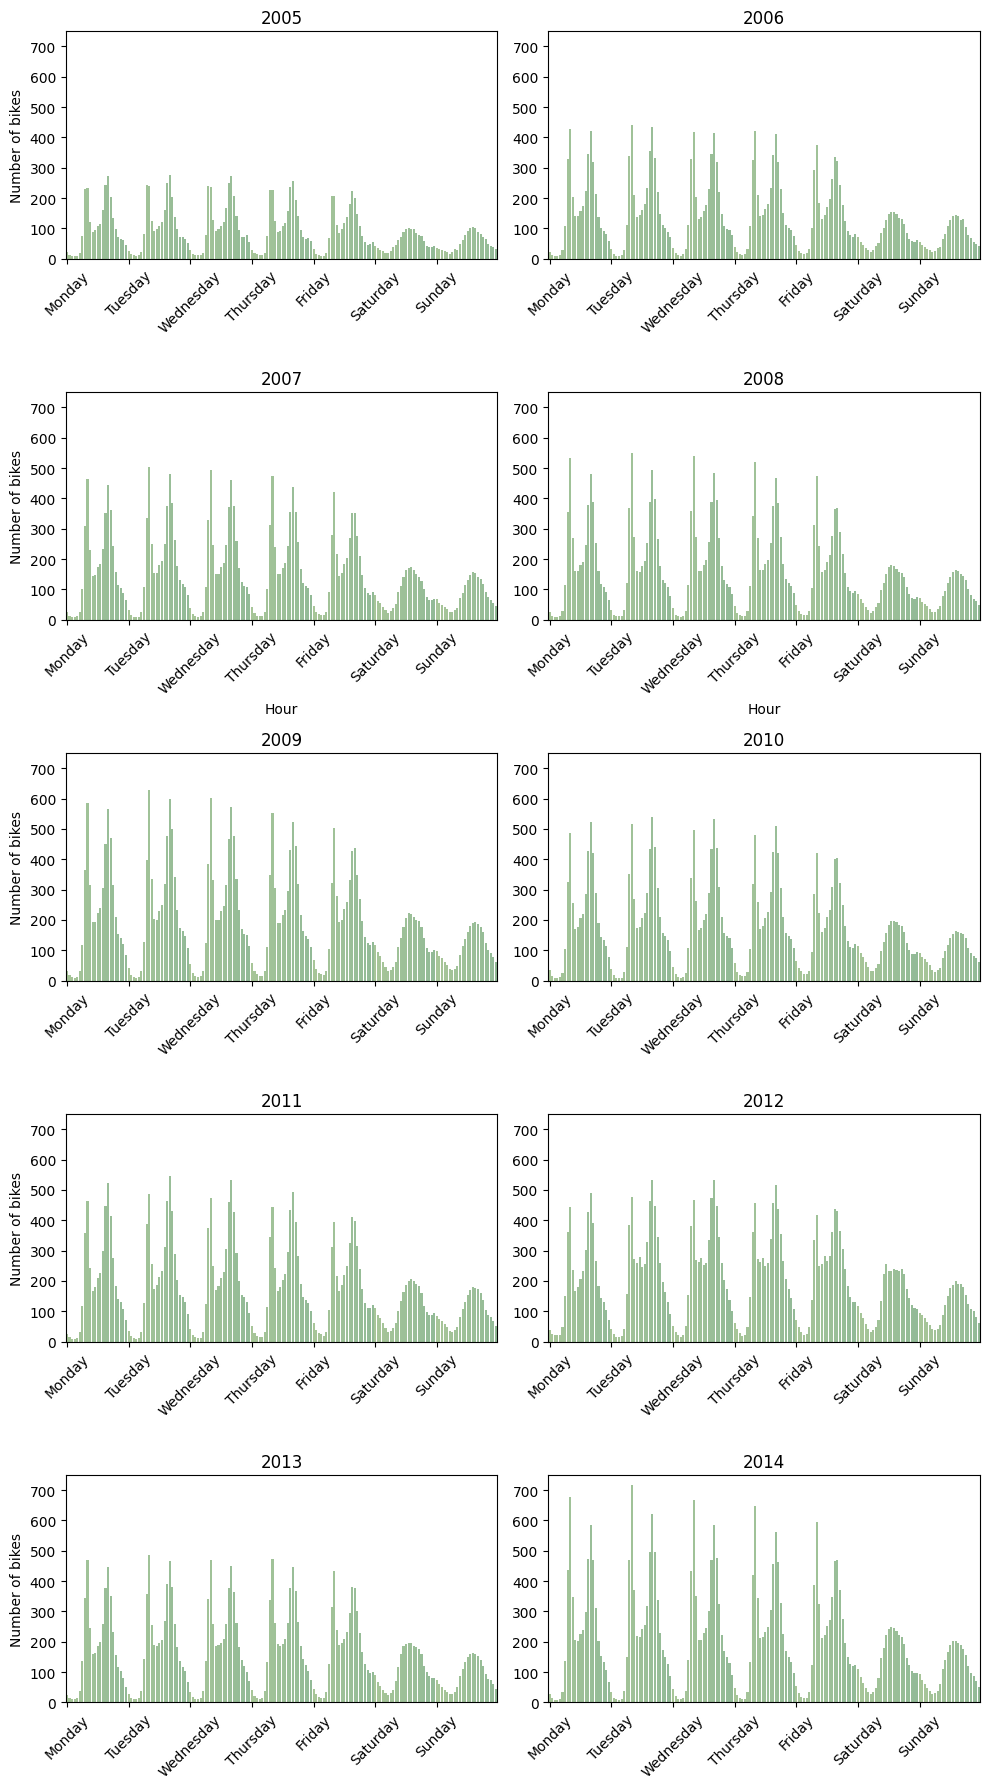

In [4]:
# Define a custom diverging blue color palette
blue_palette = sns.color_palette("crest",n_colors=24, as_cmap=True)

# Convert the ListedColormap object into a list of colors
blue_palette = [blue_palette(i) for i in range(24)]

# List of file paths for the datasets
file_paths = ['..\Data\cykeltaellinger-2005.xlsx', '..\Data\cykeltaellinger-2006.xlsx', '..\Data\cykeltaellinger-2007.xlsx',
              '..\Data\cykeltaellinger-2008.xlsx', '..\Data\cykeltaellinger-2009.xlsx', '..\Data\cykeltaellinger-2010.xlsx',
              '..\Data\cykeltaellinger-2011.xlsx', '..\Data\cykeltaellinger-2012.xlsx', '..\Data\cykeltaellinger-2013.xlsx', '..\Data\cykeltaellinger-2014.xlsx']

# Define the number of rows and columns for the subplot
num_rows = 5
num_cols = 2

# Create a new figure and axis for the subplot
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 18))

for i, file_path in enumerate(file_paths):
    # Extract the year from the file path
    year = file_path.split('-')[1].split('.')[0]
    # Read the dataset from Excel file
    data = pd.read_excel(file_path, usecols='A:AD', skiprows=10)

    data['Dato'] = pd.to_datetime(data['Dato'], format='%d.%m.%Y')
    data['weekdays'] = get_weekday(data['Dato'])
    
    # Reshape the DataFrame so that each timeslot becomes a separate row
    df = data.melt(id_vars=['Dato', 'weekdays'], value_vars=['kl.00-01', 'kl.01-02', 'kl.02-03', 'kl.03-04', 'kl.04-05',
                                                          'kl.05-06', 'kl.06-07', 'kl.07-08', 'kl.08-09', 'kl.09-10',
                                                          'kl.10-11', 'kl.11-12', 'kl.12-13', 'kl.13-14', 'kl.14-15',
                                                          'kl.15-16', 'kl.16-17', 'kl.17-18', 'kl.18-19', 'kl.19-20',
                                                          'kl.20-21', 'kl.21-22', 'kl.22-23', 'kl.23-24'],
                  var_name='Hour', value_name='Value')
    
    # Create a new column with the combined weekday and hour
    df['Weekday_Hour'] = df['weekdays'] + '_' + df['Hour']
    # print(df['Weekday_Hour'])
    
    # Define the order of weekdays and hours
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    hours = ['kl.00-01', 'kl.01-02', 'kl.02-03', 'kl.03-04', 'kl.04-05', 'kl.05-06', 'kl.06-07', 'kl.07-08', 'kl.08-09',
             'kl.09-10', 'kl.10-11', 'kl.11-12', 'kl.12-13', 'kl.13-14', 'kl.14-15', 'kl.15-16', 'kl.16-17', 'kl.17-18',
             'kl.18-19', 'kl.19-20', 'kl.20-21', 'kl.21-22', 'kl.22-23', 'kl.23-24']
    
    # Create a new column with the order of weekdays and hours
    df['Weekday_Hour'] = pd.Categorical(df['Weekday_Hour'], categories=[f'{weekday}_{hour}' for weekday in weekdays for hour in hours], ordered=True)
    
    # Sort the DataFrame based on the order of weekdays and hours
    df = df.sort_values('Weekday_Hour')
    
    # Plot the data on the corresponding subplot
    ax = axs[i // num_cols, i % num_cols]
    sns.barplot(data=df, x='Weekday_Hour', y='Value', ax=ax, ci=None, palette=blue_palette)
    ax.set_title(year)

    if i % num_cols == 0:  # Check if the subplot is in the first column
        ax.set_ylabel('Number of bikes')
    else:
        ax.set_ylabel('')  # Set empty string for y-label for other subplots
    if i // num_cols == 1:
        ax.set_xlabel('Hour')
    else:
        ax.set_xlabel('')  # Set empty string for x-label for other subplots
    ax.set_xticks(range(0, 168, 24))  # Set ticks for weekdays
    ax.set_xticklabels(weekdays, rotation=45)  # Set labels for weekdays
    ax.set_ylim(0, 750)  # Set y-axis limit to start from 0
    ax.grid(False)
    
# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the plot
plt.show()
fig.savefig('168hourplot.png', dpi=300, bbox_inches = "tight")

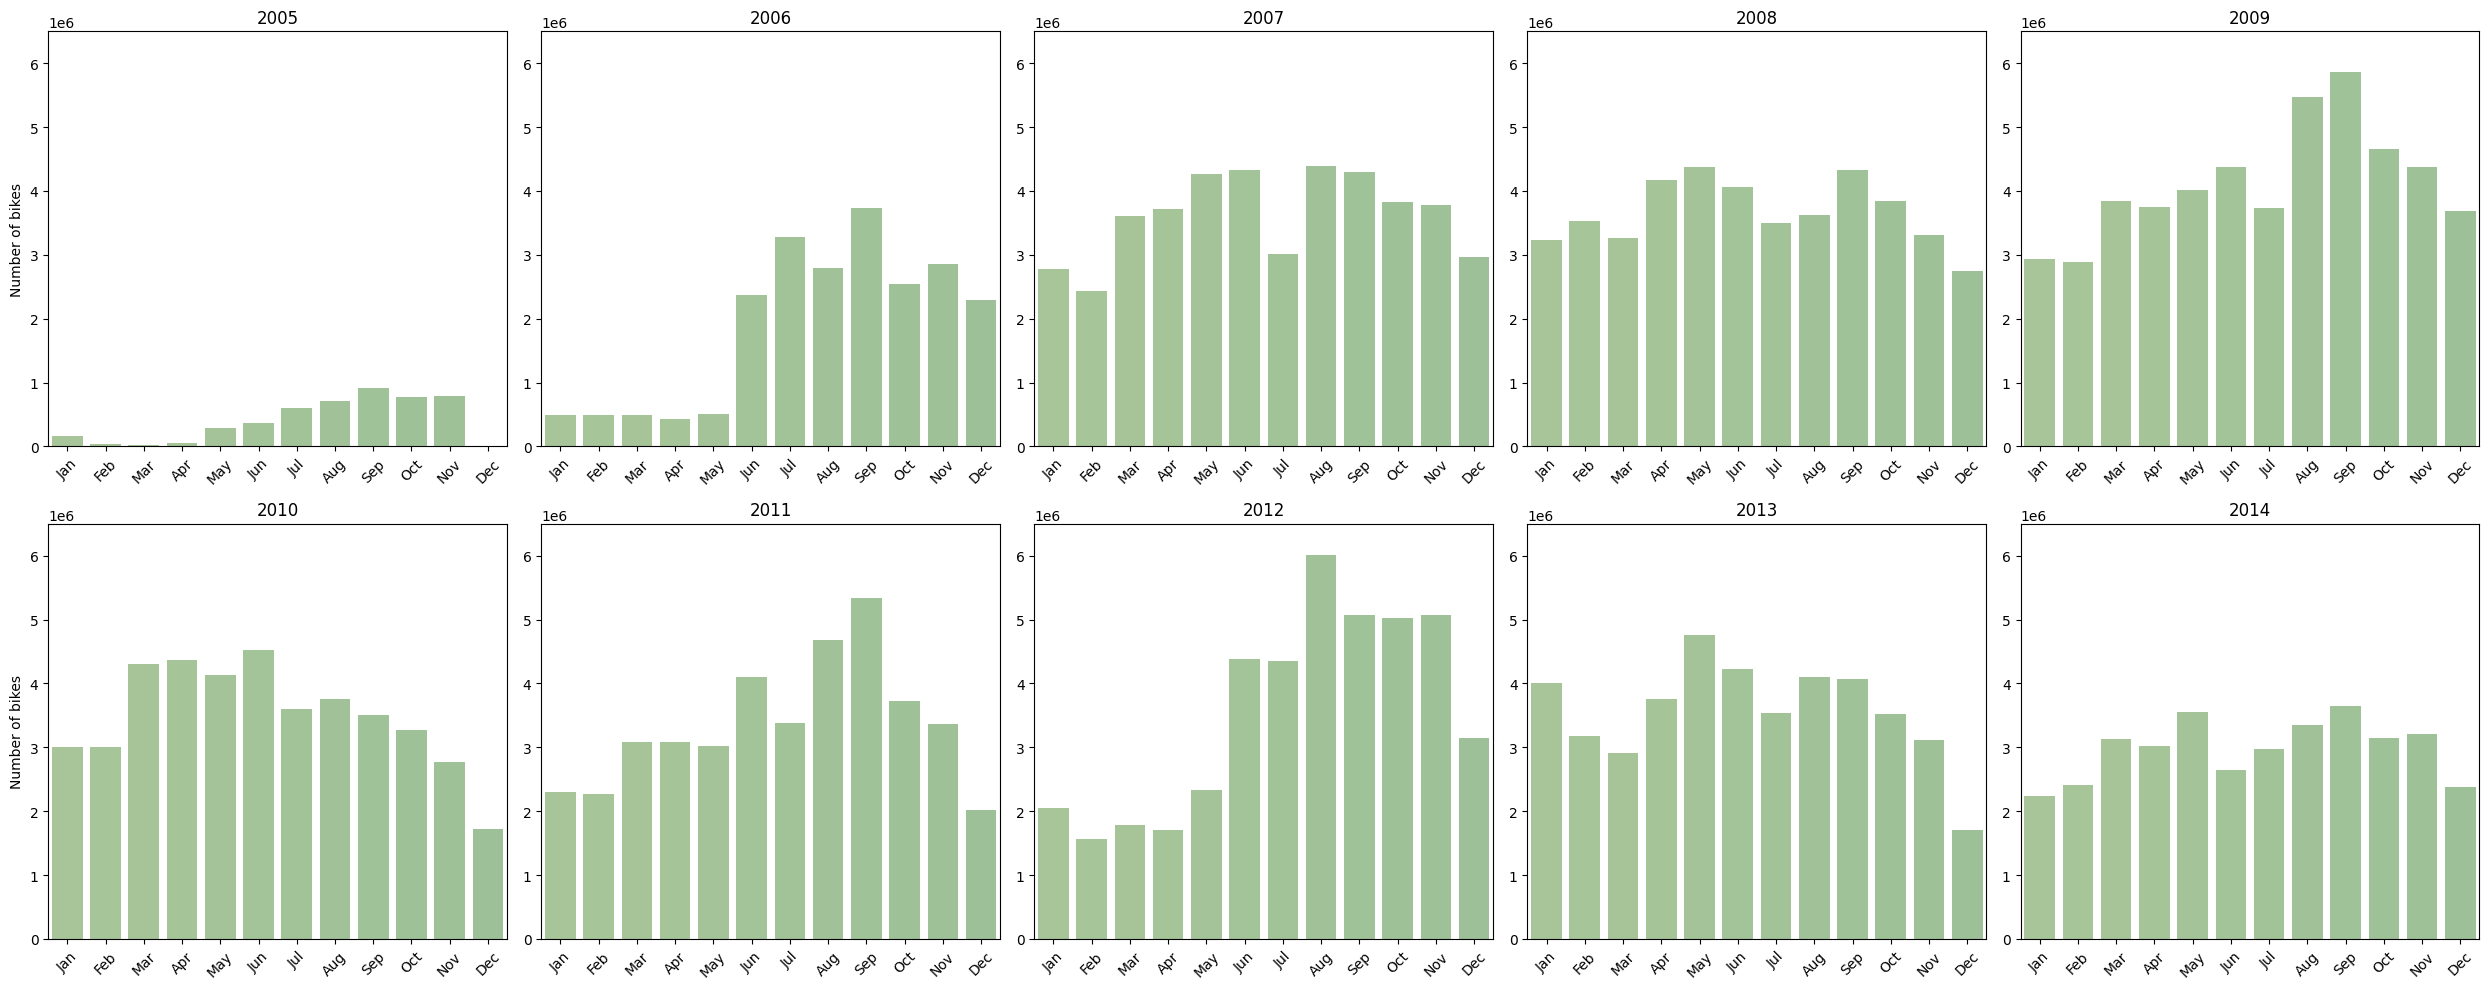

In [11]:
# Define a custom diverging blue color palette
blue_palette = sns.color_palette("crest",n_colors=24, as_cmap=True)

# Convert the ListedColormap object into a list of colors
blue_palette = [blue_palette(i) for i in range(24)]
# List of file paths for the datasets
file_paths = ['..\Data\cykeltaellinger-2005.xlsx', '..\Data\cykeltaellinger-2006.xlsx', '..\Data\cykeltaellinger-2007.xlsx',
              '..\Data\cykeltaellinger-2008.xlsx', '..\Data\cykeltaellinger-2009.xlsx', '..\Data\cykeltaellinger-2010.xlsx',
              '..\Data\cykeltaellinger-2011.xlsx', '..\Data\cykeltaellinger-2012.xlsx', '..\Data\cykeltaellinger-2013.xlsx', '..\Data\cykeltaellinger-2014.xlsx']

# Define the number of rows and columns for the subplot
num_rows = 2
num_cols = 5

# Create a new figure and axis for the subplot
fig, axs = plt.subplots(num_rows, num_cols, figsize=(25, 10))

for i, file_path in enumerate(file_paths):
    # Extract the year from the file path
    year = file_path.split('-')[1].split('.')[0]
    # Read the dataset from Excel file
    data = pd.read_excel(file_path, usecols='A:AD', skiprows=10)

    data['Dato'] = pd.to_datetime(data['Dato'], format='%d.%m.%Y')

    # Sum the values across the time slots for each row
    data['Total_Value'] = data.iloc[:, 6:].sum(axis=1)
    
    # Extract the month from the 'Dato' column
    data['Month'] = data['Dato'].dt.month
    
    # Aggregate the data based on the month and sum the values
    monthly_data = data.groupby('Month').sum()
    
    # Ensure December has data, if not, append a row with zeros
    if 12 not in monthly_data.index:
        monthly_data.loc[12] = 0
    
    # Plot the data on the corresponding subplot
    ax = axs[i // num_cols, i % num_cols]
    sns.barplot(data=monthly_data, x=monthly_data.index, y='Total_Value', ax=ax, ci=None, palette=blue_palette)
    ax.set_title(year)
    if i % num_cols == 0:  # Check if the subplot is in the first column
        ax.set_ylabel('Number of bikes')
    else:
        ax.set_ylabel('')  # Set empty string for y-label for other subplots
    if i // num_cols == 2:
        ax.set_xlabel('Month')
    else:
        ax.set_xlabel('')  # Set empty string for x-label for other subplots
    ax.set_xticks(range(0, 12))  # Set tick locations for all months
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)  # Set labels for months with rotation
    ax.set_ylim(0, 6.5e6)  
    ax.grid(False)  # Remove grid lines
    
# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the plot
plt.show()
fig.savefig('monthlyplot.png', dpi=300, bbox_inches = "tight")



In [4]:
from bokeh.models import ColumnDataSource, Whisker
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap, jitter
from bokeh.models import Range1d
import pandas as pd
from bokeh.palettes import Category20b

# Load data
file_path = "..\Data\cykeltaellinger-2008.xlsx"
data = pd.read_excel(file_path, usecols='A:AD', skiprows=10)

# Convert 'Dato' column to datetime and extract month
data['Month'] = pd.to_datetime(data['Dato'], format='%d.%m.%Y').dt.month

# Sum the values across the time slots for each row
data['Total_Value'] = data.iloc[:, 6:].sum(axis=1)

# Define the order of months
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# Map month numbers to month names
data['Month_Name'] = data['Month'].map({i + 1: month_order[i] for i in range(12)})

# Sort the DataFrame by month order
data['Month_Name'] = pd.Categorical(data['Month_Name'], categories=month_order, ordered=True)
data = data.sort_values(by='Month_Name')

# Create the figure
p = figure(height=750, width=1000, x_range=month_order, background_fill_color="#efefef",
           title="xxxxx")
p.xgrid.grid_line_color = None

# Group by month name
g = data.groupby("Month_Name")
upper = g.Total_Value.quantile(0.75)
lower = g.Total_Value.quantile(0.25)

# Create ColumnDataSource
source = ColumnDataSource(data=dict(base=month_order, upper=upper, lower=lower))

# Create Whisker plot
error = Whisker(base="base", upper="upper", lower="lower", source=source,
                level="annotation", line_width=2)
error.upper_head.size = 20
error.lower_head.size = 20
p.add_layout(error)

# Update factor_cmap
color_map = factor_cmap(field_name='Month_Name', palette=Category20b[12], factors=month_order)

# Create the scatter plot
p.scatter(jitter("Month_Name", 0.3, range=p.x_range), "Total_Value", source=data,
          alpha=0.5, size=7, line_color="white", color=color_map)

p.y_range = Range1d(0, np.max(data["Total_Value"])+20)

show(p)


In [ ]:
import pandas as pd

# List of file paths for the datasets
file_paths = [
    "../Data/cykeltaellinger-2005.xlsx",
    "../Data/cykeltaellinger-2006.xlsx",
    "../Data/cykeltaellinger-2007.xlsx",
    "../Data/cykeltaellinger-2008.xlsx",
    "../Data/cykeltaellinger-2009.xlsx",
    "../Data/cykeltaellinger-2010.xlsx",
    "../Data/cykeltaellinger-2011.xlsx",
    "../Data/cykeltaellinger-2012.xlsx",
    "../Data/cykeltaellinger-2013.xlsx",
    "../Data/cykeltaellinger-2014.xlsx",
    # Add more file paths as needed
]

# List to store DataFrames
dfs = []

# Iterate over file paths, read Excel files, and append to dfs list
for file_path in file_paths:
    data = pd.read_excel(file_path, usecols='A:AD', skiprows=10)
    dfs.append(data)

# Concatenate DataFrames
data_com = pd.concat(dfs, ignore_index=True)
data_com['Month'] = pd.to_datetime(data_com['Dato'], format='%d.%m.%Y').dt.month
data_com['year'] =pd.to_datetime(data_com['Dato'], format='%d.%m.%Y').dt.year
data_com['Total_Value'] = data_com.iloc[:, 6:].sum(axis=1)

